In [80]:
# solving non linear poisson equation using bvp's

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# define the equation
def q(x):
    return 0

# define the boundary conditions
alpha = 0
beta = 0

# define the domain
a = 0
b = 1

# define the number of grid points
N = 50

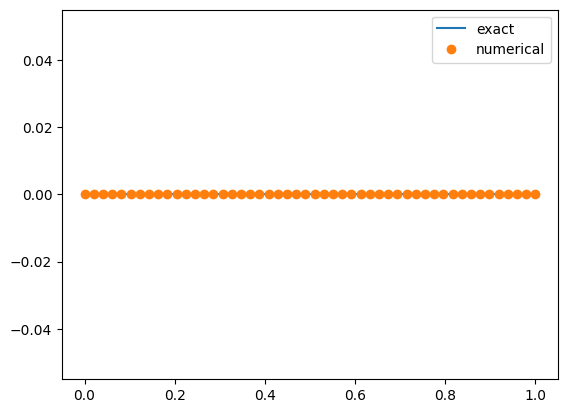

In [81]:
# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta):
    f_1 = (u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = (u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = (beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

sol = root(f, u, args=(dx,N, q, alpha, beta))

# separate the solution
u = sol.x

# exact solution for source term q(x) = 0
def exact(x):
    return ((beta - alpha)/(b - a))*(x- a) + alpha

# plot the exact solution
plt.plot(xi, exact(xi), '-', label='exact')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()

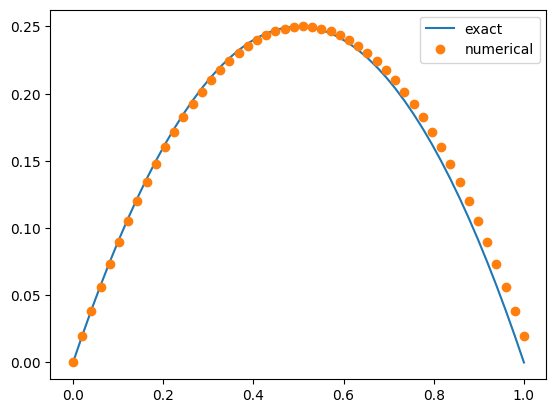

In [82]:
# now try for q(x) = 1

# define the equation
def q(x):
    return 1

# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta, D):
    f_1 = D*(u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = D*(u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = D*(beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

# D is the diffusion coefficient
D = 0.5

sol = root(f, u, args=(dx,N, q, alpha, beta, D))

# separate the solution
u = sol.x

# exact solution for source term q(x) = 1
def exact(x):
    return (-1/(2*D))*(x - a) * (x - b) + ((beta - alpha)/(b - a))*(x- a) + alpha

# plot the exact solution
plt.plot(xi, exact(xi), '-', label='exact')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()

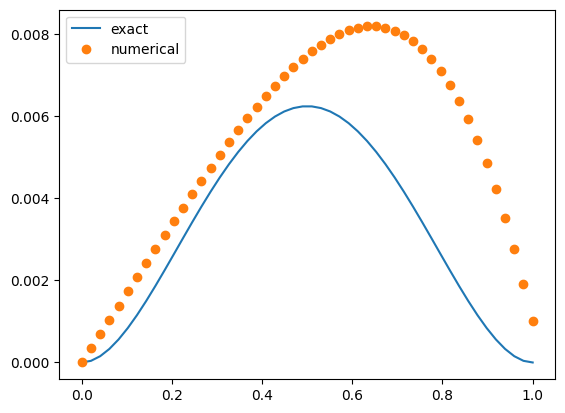

In [90]:
# now try for q(x) = x

# define the equation
def q(x):
    return x**2

# discretise the domain
xi = np.linspace(a, b, N)

# solve using scipy root - f(u) = 0
def f(u, dx,N, q, alpha, beta, D):
    f_1 = D*(u[2] - 2*u[1] + alpha)/dx**2 + q(xi[1])
    f_i = D*(u[2:N] - 2*u[1:N-1] + u[:N-2])/dx**2 + q(xi[1:N-1])
    f_N1 = D*(beta - 2*u[N-1] + u[N-2])/dx**2 + q(xi[N-1])

    return np.concatenate(([f_1], f_i[:], [f_N1]))


dx = (b - a)/N
# initial guess
u = np.zeros(N)

# D is the diffusion coefficient
D = 5

sol = root(f, u, args=(dx,N, q, alpha, beta, D))

# separate the solution
u = sol.x

# exact solution for source term q(x) = x**2
def exact(x):
    return (1/(2*D))*(x - a)**2 * (x - b)**2 + ((beta - alpha)/(b - a))*(x- a) + alpha


# plot the exact solution
plt.plot(xi, exact(xi), '-', label='exact')

# plot the solution
plt.plot(xi, u, 'o', label='numerical')
plt.legend()
plt.show()
